# Tensor 
- 숫자를 위한 컨테이너, 임의의 차원을 가지는 행렬의 일반화된 모습
    1. scalar(0D tensor)
    1. vector(1D tensor)
    1. matrix(2D tensor)
    1. 고차원Tensor
- Tensor의 핵심 속성
    1. rank
    1. shape
    1. dtype

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [8]:
# rank 축의 수를 확인
train_images.ndim

3

In [7]:
# 배열의 크기를 확인
train_images.shape

(60000, 28, 28)

In [6]:
# 속성을 확인
train_images.dtype

dtype('uint8')

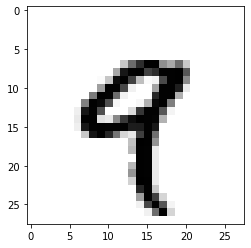

In [10]:
digit = train_images[4]
import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 넘파이로 텐서 조작하기
배열에 있는 특정 원소들을  선택하는 것을 Slicing이라고 합니다.

In [11]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [13]:
my_slice = train_images[10:100,:,:]
print(my_slice.shape)

(90, 28, 28)


In [15]:
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


## 배치 데이터
딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 그 대신 데이터를 작은 batch로 나눈다.

> 예를 들어 데이터 크기가 128인 batch하나는 다음과 같다.

In [ ]:
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
batch_n = train_images[128*n:256*(n+1)]

> 첫번째 축을 batch axis 또는 batch dimension이라고 한다.

## 벡터 데이터
하나의 데이터 포인트가 벡터로 인코딩될 수 있다. 여기서 첫번째 축은 simple axis이고 두번재 축은 feature axis이다.
> ex) 사람의 나이 우편번호 소득으로 구성된 인구 데이터 (10000,3)으로 저장

## 시계열 데이터 또는 스퀀스 데이터
> ex) 주식가격 데이터셋에서 하루거래는 (250, 390,3) 250일 390분 3개의데이터

## 이미지 데이터
> ex) (128,256,256,3) 128개수 256,256 컬러 3 데이터수

## 비디오 데이터
> ex) (samples, frames, height, width, color_depth)

# Tensor 연산

In [29]:
# keras.layer.Dense(512,activation='rulu')
# output = rulu(dot(W,input)+b)

## broadcasting
- 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 broadcasting된다.
    1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가된다.
    2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복된다.

In [34]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)
print(x.shape)
print(z.shape)
print(z)

(64, 3, 32, 10)
(64, 3, 32, 10)
[[[[0.53902524 0.68069568 0.83475321 ... 0.99092984 0.62840726
    0.92712243]
   [0.570279   0.64209949 0.41452966 ... 0.51023284 0.85614206
    0.79477092]
   [0.84428562 0.23836484 0.89721236 ... 0.80524311 0.81101612
    0.73110909]
   ...
   [0.64881993 0.48866088 0.67801712 ... 0.92861595 0.36632004
    0.7246445 ]
   [0.41661201 0.44478948 0.98299041 ... 0.67855984 0.93755897
    0.84817024]
   [0.52852919 0.77412166 0.10617864 ... 0.67281278 0.22685111
    0.41401951]]

  [[0.53902524 0.84580399 0.38672797 ... 0.90001551 0.63907384
    0.61417383]
   [0.71556852 0.61701234 0.80037077 ... 0.26258262 0.78252209
    0.7771017 ]
   [0.53333688 0.23836484 0.67167884 ... 0.71793842 0.71944801
    0.60484609]
   ...
   [0.80723694 0.48866088 0.65369492 ... 0.92861595 0.462508
    0.88580542]
   [0.29059437 0.34855647 0.98299041 ... 0.67855984 0.40952786
    0.97169501]
   [0.89232142 0.9330987  0.16594639 ... 0.83104117 0.3372281
    0.41401951]]

  [[0

##  dot operation(tensor product)


## 텐서 크기 변환


## 텐서 연산의 기하학적 해석


# 신경망의 엔진 : 그래디언트 기반 최적화
        output=relu(dot(W,input)+b)

        W,b : weight, trainable parameter
        W : kernel
        b : bias
1. 처음 weight은 random initialization 상태이다.
1. 훈련을 통해 점진적 조정이 일어난다.
1. 이때 미분을 통하여 쉽게 목표값을 찾을 수 있다.